# Airline passenger satisfaction analysis

In [263]:
%pip install kagglehub
%pip install scikit-learn
%pip install seaborn
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [290]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Preprocessing

### Data uploading

In [264]:
path = kagglehub.dataset_download("johndddddd/customer-satisfaction")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\z004ve1z\.cache\kagglehub\datasets\johndddddd\customer-satisfaction\versions\2


In [265]:
df = pd.read_excel(f"{path}/satisfaction.xlsx")
df.shape

(129880, 24)

In [266]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [268]:
df.describe()
# Here we see that none of numeric columns has negative number neither strange ouliers.

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [281]:
# Splitting data into train and test set

X = df.loc[:, df.columns != 'satisfaction_v2']
y = df['satisfaction_v2']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 123)

### Data exploration

In [270]:
X_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             318
dtype: int64

Text(0.5, 1.0, 'Number of passengers by their Gender')

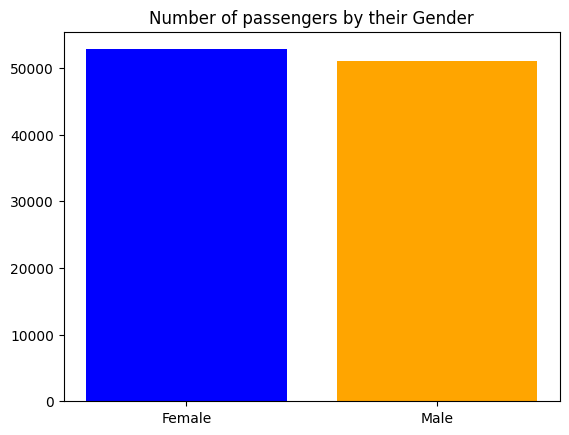

In [271]:
# Exploring number of male and female
gender_counts = X_train["Gender"].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color = ["Blue", "Orange"])
plt.title("Number of passengers by their Gender")

In [272]:
# Exploring target value 
y_train.value_counts()

satisfaction_v2
satisfied                  56856
neutral or dissatisfied    47048
Name: count, dtype: int64

In [273]:
pd.crosstab(X_train["Customer Type"], y_train)

satisfaction_v2,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,32554,52288
disloyal Customer,14494,4568


In [274]:
pd.crosstab(X_train["Type of Travel"] , y_train)

satisfaction_v2,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,29913,41860
Personal Travel,17135,14996


In [275]:
pd.crosstab(X_train["Class"], y_train)

satisfaction_v2,neutral or dissatisfied,satisfied
Class,,
Business,14484,35281
Eco,28275,18350
Eco Plus,4289,3225


Text(0.5, 1.0, 'Number of passengers by their Age')

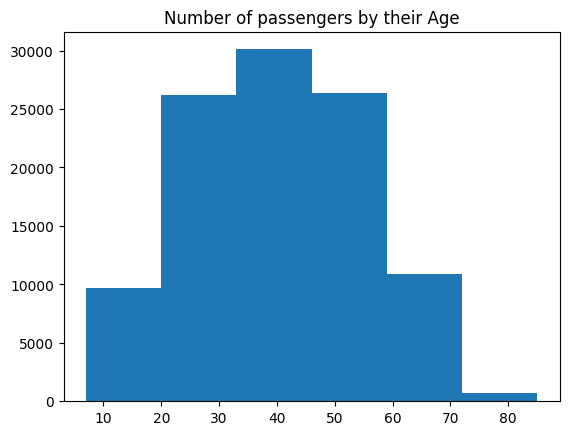

In [276]:
plt.hist(X_train["Age"], bins = 6)
plt.title("Number of passengers by their Age")

count    103904.000000
mean         14.682592
std          37.718990
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1305.000000
Name: Departure Delay in Minutes, dtype: float64

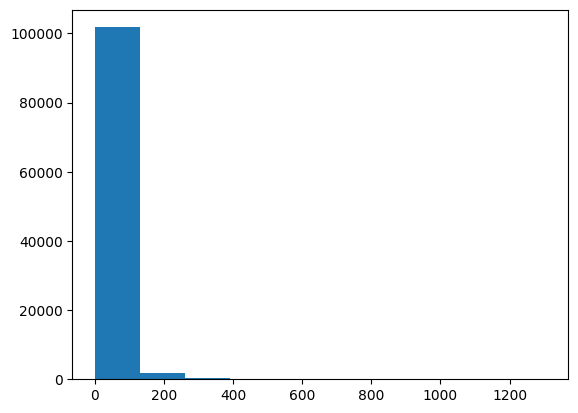

In [277]:
plt.hist(X_train["Departure Delay in Minutes"])
X_train["Departure Delay in Minutes"].describe()

<Axes: >

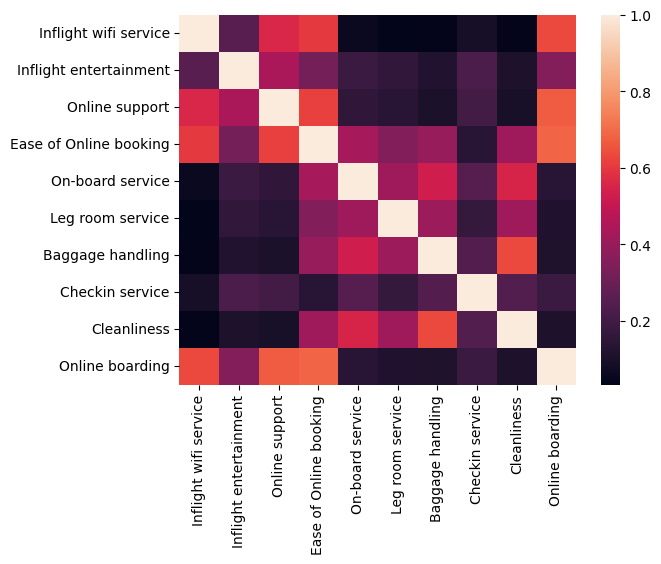

In [278]:
# Correlation between features, that represent rating for different services
X_train["isSatisfied"] = (y_train == "satisfied")
train_features = X_train.loc[:, "Inflight wifi service" : "Online boarding"]
corr = train_features.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Data transformation
__Requirements on preprocessing:__

- remove rows based on subsetting
- derive new columns✅
- use aggregation operators
- treat missing values ✅

(Any two of the following operations are mandatory)

In [282]:
X_train.drop(columns=["id"], inplace=True)
X_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [283]:
X_train = pd.get_dummies(X_train, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
X_train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
74733,45,2980,2,5,2,5,5,3,2,2,...,49.0,False,True,True,False,True,False,True,False,False
99295,38,3416,2,2,2,2,3,4,4,4,...,7.0,True,False,True,False,True,False,True,False,False
75090,74,394,2,2,2,2,5,3,4,2,...,17.0,True,False,True,False,True,False,False,True,False
107819,55,3111,3,3,3,3,5,4,5,4,...,18.0,True,False,True,False,True,False,True,False,False
114012,59,1289,5,5,5,5,5,5,5,5,...,1.0,False,True,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,23,2183,5,0,5,1,1,5,1,1,...,0.0,False,True,False,True,True,False,False,True,False
17730,60,3185,2,5,2,3,2,4,4,4,...,160.0,False,True,True,False,False,True,False,True,False
28030,65,1851,3,4,4,1,5,4,5,5,...,7.0,False,True,True,False,False,True,False,True,False
15725,9,2131,2,2,2,2,5,5,5,4,...,0.0,True,False,True,False,False,True,False,True,False


In [284]:
arrival_delay_median = X_train["Arrival Delay in Minutes"].median()
X_train["Arrival Delay in Minutes"] = X_train["Arrival Delay in Minutes"].fillna(arrival_delay_median)
X_train.isnull().sum()

Age                                  0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business                       0
Class_Eco                

In [254]:
X_train["Is_Male"] = (X_train["Gender"] == "Male").astype(int)
X_train["Is_Male"]


74733     1
99295     0
75090     0
107819    0
114012    1
         ..
61404     1
17730     1
28030     1
15725     0
118270    1
Name: Is_Male, Length: 103904, dtype: int64

In [255]:
binned_data_age = pd.cut(X_train["Age"], 
                     bins=[5, 15, 30, 45, 60, 75, 100], 
                     labels=['5-15', '15-30', '30-45', '45-60', '60-75', '75+'])
X_train["Age"] = binned_data_age

In [256]:
age_satisfaction_distribution = pd.crosstab(X_train["Age"] , y_train)
age_satisfaction_distribution

satisfaction_v2,neutral or dissatisfied,satisfied
Age,,
5-15,3410,2530
15-30,14802,11960
30-45,14346,18931
45-60,9989,19919
60-75,4267,3425
75+,234,91


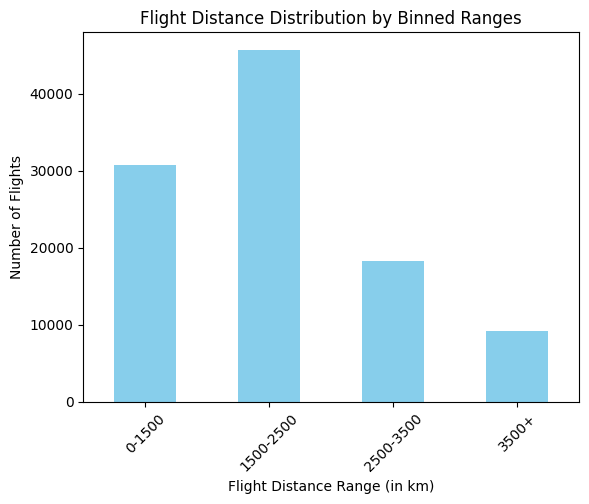

In [257]:
binned_data_distance = pd.cut(X_train["Flight Distance"], 
                     bins=[0, 1500, 2500, 3500, 10000], 
                     labels=['0-1500', '1500-2500', '2500-3500', '3500+'])

bin_counts = binned_data_distance.value_counts().sort_index()

bin_counts.plot(kind='bar', color='skyblue')
plt.title('Flight Distance Distribution by Binned Ranges')
plt.xlabel('Flight Distance Range (in km)')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [258]:
# Departure Delay in Minutes bins
binned_data_dep_delay = pd.cut(X_train["Departure Delay in Minutes"], 
                     bins=[-0.001, 0.1, 120, 1440, 6000], 
                     labels=['No delay', '< 2 hours', '2-24 hours', '24+ hours'])

dep_bin_counts = binned_data_dep_delay.value_counts().sort_index()

# Arrival Delay in Minutes bins
binned_data_arr_delay = pd.cut(X_train["Arrival Delay in Minutes"], 
                     bins=[-0.001, 0.1, 120, 1440, 6000], 
                     labels=['No delay', '< 2 hours', '2-24 hours', '24+ hours'])

arr_bin_counts = binned_data_arr_delay.value_counts().sort_index()

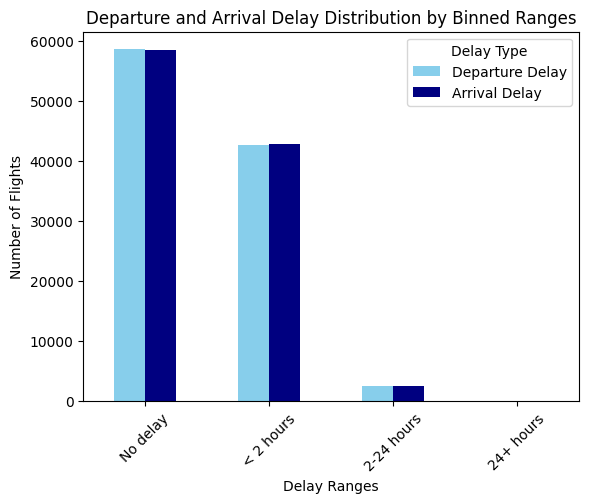

In [259]:
bin_counts_df = pd.DataFrame({
    'Departure Delay': dep_bin_counts,
    'Arrival Delay': arr_bin_counts
})

bin_counts_df.plot(kind='bar', color=['skyblue', 'navy'])
plt.title('Departure and Arrival Delay Distribution by Binned Ranges')
plt.xlabel('Delay Ranges')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.show()

In [260]:
X_train["Departure Delay in Minutes"] = binned_data_dep_delay
X_train["Arrival Delay in Minutes"] = binned_data_arr_delay

In [261]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Is_Male
74733,Male,Loyal Customer,30-45,Business travel,Business,2980,2,5,2,5,...,2,2,2,2,3,2,2,< 2 hours,< 2 hours,1
99295,Female,Loyal Customer,30-45,Business travel,Business,3416,2,2,2,2,...,4,4,4,4,5,4,5,< 2 hours,< 2 hours,0
75090,Female,Loyal Customer,60-75,Business travel,Eco,394,2,2,2,2,...,2,2,2,2,3,2,1,< 2 hours,< 2 hours,0
107819,Female,Loyal Customer,45-60,Business travel,Business,3111,3,3,3,3,...,4,4,4,4,3,4,4,< 2 hours,< 2 hours,0
114012,Male,Loyal Customer,45-60,Business travel,Eco,1289,5,5,5,5,...,5,4,3,2,2,2,5,< 2 hours,< 2 hours,1


## Analysis

__Use any classifier. Choose one of the following two options:__

- perform train/test split✅
- use crossvalidation

Also, evaluate and compare at least two algorithms of different types (e.g. logistic regression and random forest).

### Logistic Regresstion model

In [ ]:
lr_model = LogisticRegression()


### Decition Tree model

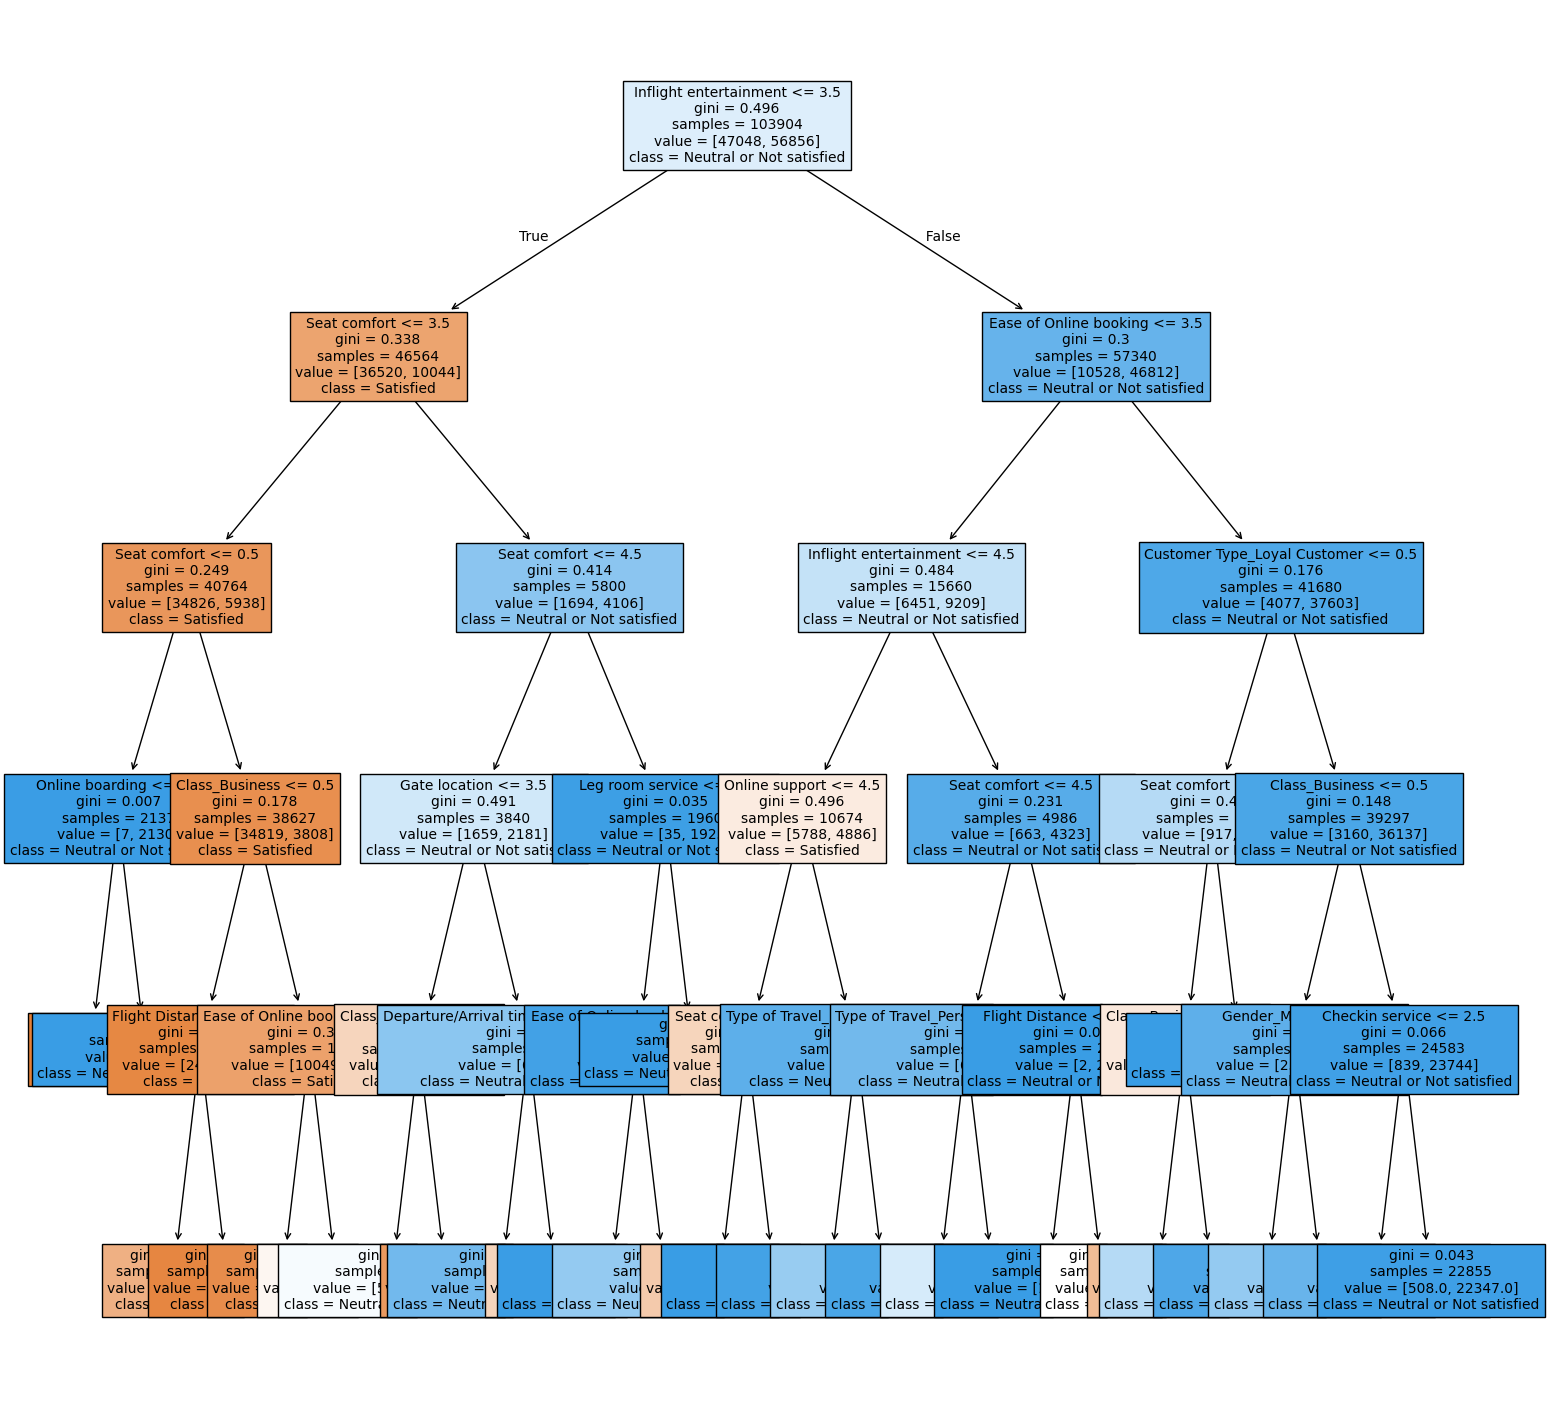

In [288]:
dt_model = DecisionTreeClassifier(max_depth = 5)

dt_model.fit(X_train, y_train)
plt.figure(figsize=(18,18))
plot_tree(dt_model,feature_names = list(X_train.columns), 
               class_names=["Satisfied","Neutral or Not satisfied"],
               filled = True,fontsize=10)  
plt.savefig('tree.png')

### Random Forest model

In [ ]:
rf_model = RandomForestClassifier()

__Requirements on hyperparameter tuning__

If the chosen classifier has any hyperparameters that can be tuned, use one of the following methods:

- try several configurations and describe the best result in the final report
- perform grid search or other similar automatic method
- once you have tuned hyperparameters on a dedicated development (training) set, e.g. with GridSearchCV, you can
- retrain the model on the complete training data, as e.g. described here and here

## Validation

__Requirements on model evaluation__

- report the accuracy on test set/crossvalidation
- if you are performing binary classification task, show the ROC curve
- make sure to use dedicated dataset for evaluation

Python: use model_selection.cross_val_score, plot the roc curve using

In [293]:
dt_prediction = dt_model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Class
- Customer Type
- Gender
- Type of Travel
- id
Feature names seen at fit time, yet now missing:
- Class_Business
- Class_Eco
- Class_Eco Plus
- Customer Type_Loyal Customer
- Customer Type_disloyal Customer
- ...


In [291]:
print(confusion_matrix(y_test, dt_prediction))

ValueError: Found input variables with inconsistent numbers of samples: [25976, 103904]

In [292]:
accuracy_score(y_test, dt_prediction)

ValueError: Found input variables with inconsistent numbers of samples: [25976, 103904]